Customer_churn_Prediction using ANN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Dataset/Churn_Modelling.csv')

In [4]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
#create dummy variable
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [6]:
#concat the data_frames
X = pd.concat([X,geography,gender], axis=1)

In [7]:
#drop unessary column
X = X.drop(['Geography','Gender'], axis=1)

In [8]:
#splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [9]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Part-2 Now let's make the ANN

In [10]:
#import the keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [11]:
#initialising thE ANN
classifier = Sequential()

In [17]:
#Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation='relu', input_dim = 11))

#adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation='relu'))

#adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))


In [19]:
#compiling the ANN
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [25]:
#fitting the ANN to the training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 21s 3ms/step - loss: 0.8241 - accuracy: 0.4560 - val_loss: 0.5547 - val_accuracy: 0.7732
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7862 - val_loss: 0.4972 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4921 - accuracy: 0.7922 - val_loss: 0.4826 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4805 - accuracy: 0.7866 - val_loss: 0.4727 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4733 - accuracy: 0.7919 - val_loss: 0.4644 - val_accuracy: 0.7982
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4431 - accuracy: 0.8065 - val_loss: 0.4575 - val_accuracy: 0.8031
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4342 - accuracy: 0.8142 - val_loss: 0.4521 - val_accuracy: 0.808

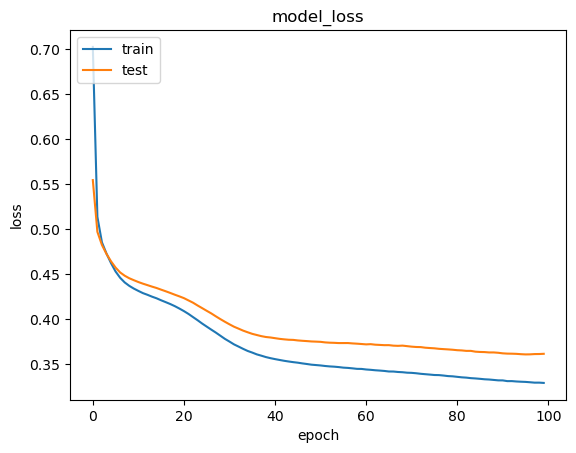

In [26]:
#summarise history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Making the prediction & evaluating the model

In [40]:
#predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5).astype(int)

In [28]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

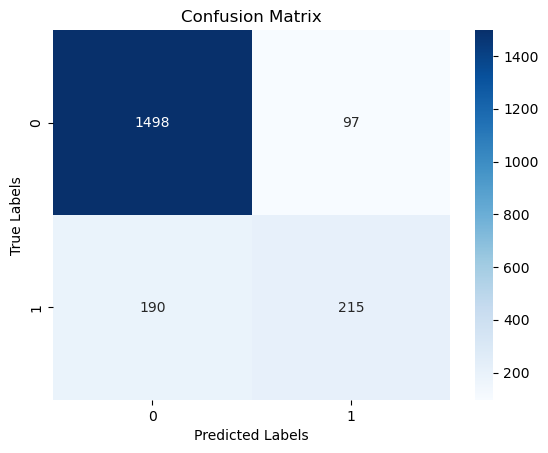

In [31]:
import seaborn as sns

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [33]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8565

In [41]:
y_pred[15][0]

1